<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT: Avocado Project</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.head(25)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [4]:
df.tail(25)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18224,11,2018-01-07,1.51,1517332.70,129541.43,296490.29,1289.07,1089861.24,915452.78,174381.57,26.89,organic,2018,TotalUS
18225,0,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18228,3,2018-03-04,1.46,347373.17,25990.60,71213.19,79.01,250090.37,85835.17,164087.33,167.87,organic,2018,West
18229,4,2018-02-25,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,organic,2018,West
18230,5,2018-02-18,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,organic,2018,West
18231,6,2018-02-11,1.47,275248.53,24732.55,61713.53,243.00,188559.45,88497.05,99810.80,251.60,organic,2018,West
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.shape

(18249, 14)

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
df['type'].nunique()

2

In [9]:
for i in df.columns[:14]:

        abc=df[i].unique()
        print ("Unique Values is:", abc)
        

Unique Values is: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Unique Values is: ['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10

In [10]:
name_unique_types = df['type'].unique()
print(name_unique_types)


['conventional' 'organic']


In [11]:
df.isnull().value_counts()

Unnamed: 0  Date   AveragePrice  Total Volume  4046   4225   4770   Total Bags  Small Bags  Large Bags  XLarge Bags  type   year   region
False       False  False         False         False  False  False  False       False       False       False        False  False  False     18249
dtype: int64

We have dropped Columns Name:['Unnamed: 0','Date'], from DataFrame

In [12]:
columns_to_drop=['Unnamed: 0','Date']
df=df.drop(columns=columns_to_drop,axis=1)

In [13]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">One-Hot Encoding Process:region and type </span>

In [15]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [16]:
from sklearn.preprocessing import LabelEncoder

column_to_encode = ['type', 'region']
le = LabelEncoder()

df1 = df.copy()  # Create a copy of the original DataFrame

for k in column_to_encode:
    df1[k] = le.fit_transform(df[k])

# Now, df1 contains the encoded values for the specified columns
df1


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [17]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION:CORRELATION BETWEEN VARIABLES OF DATASET</span>

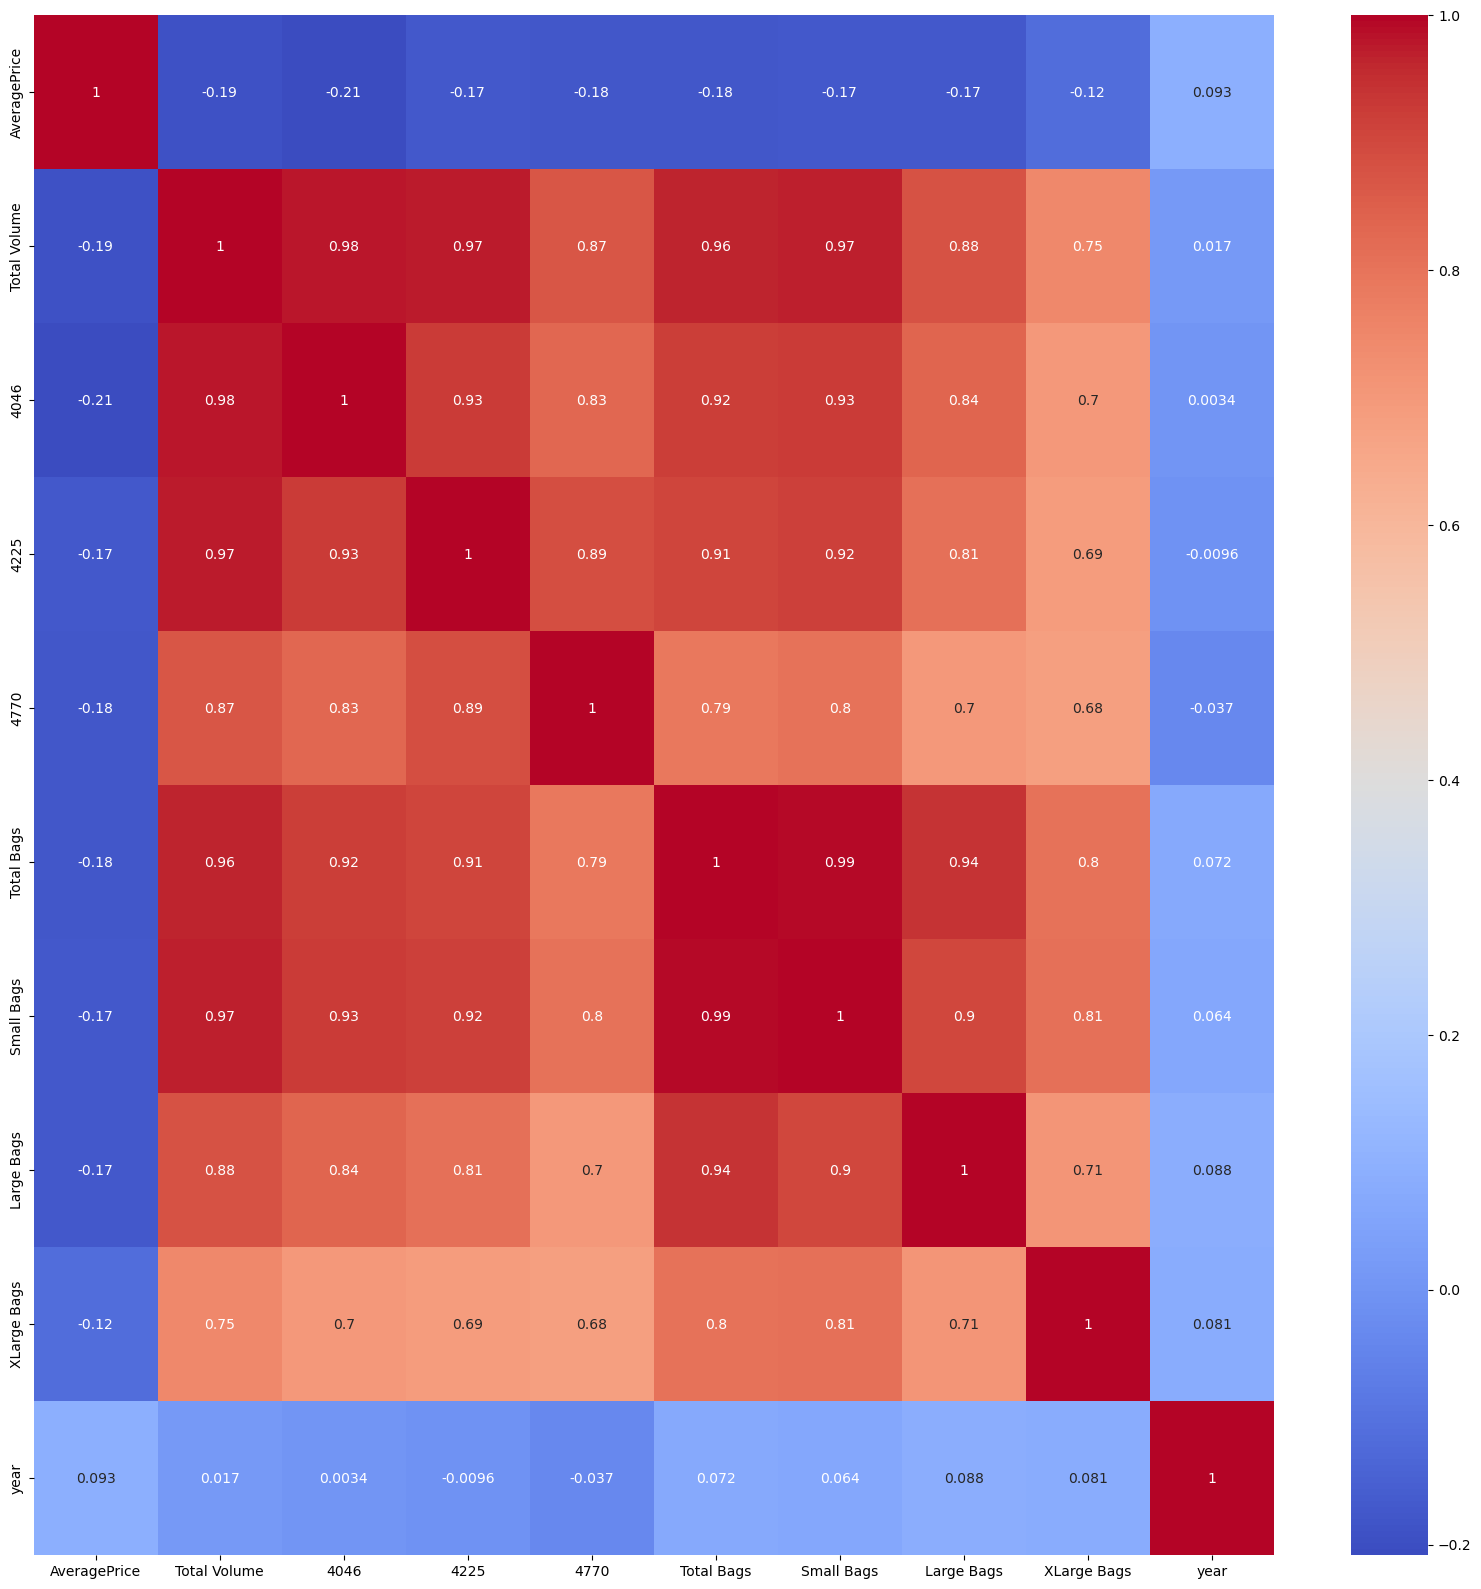

In [18]:
plt.figure(figsize=(20,20), facecolor='white')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">STATS OF DATASET</span>

In [19]:
df1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


In [20]:
df1.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">CORRECTION OF SKEWNESS</span>

In [21]:
# Correct skewness using Box-Cox transformation
skewed_columns_mask = np.array(df1.skew().abs() > 0.5)
skewed_columns = df1.columns[skewed_columns_mask]

# Calculate the constant using a dictionary comprehension
constants = {col: abs(df1[col].min()) + 1 for col in skewed_columns}

# Apply Box-Cox transformation with the correct constant for each column
for col in skewed_columns:
    constant = constants[col]
    df1[col] = df1[col].apply(lambda x: x + constant if x <= 0 else x)
    transformed_col, _ = boxcox(df1[col])
    df1[col] = transformed_col

# Display the DataFrame after correcting skewness
print("\nDataFrame after correcting skewness:")
print(df1)
print("\nSkewness of each column after transformation:")
print(df1.skew())



DataFrame after correcting skewness:
       AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0          0.294870     10.021172  8.048942  15.704275  3.746230   10.576131   
1          0.310849      9.892382  7.480016  15.310511  3.924971   10.696283   
2         -0.071960     10.516534  7.696128  17.121395  4.669723   10.487823   
3          0.077655     10.189714  8.166453  16.265332  4.128159   10.035704   
4          0.254100      9.832972  7.920590  15.274912  4.168175   10.118578   
...             ...           ...       ...        ...       ...         ...   
18244      0.517484      8.925925  8.969614   9.329721  0.000000   11.173670   
18245      0.571478      8.752758  8.235356  10.648455  0.000000   10.661585   
18246      0.673900      8.745391  8.235603  10.092416  6.224778   10.680325   
18247      0.710577      8.882169  8.570372  10.413975  6.223638   10.890599   
18248      0.510593      8.946001  9.448726  10.026624  5.165707   11.014470   

 

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: Skewness Corrected-Interpretation</span>

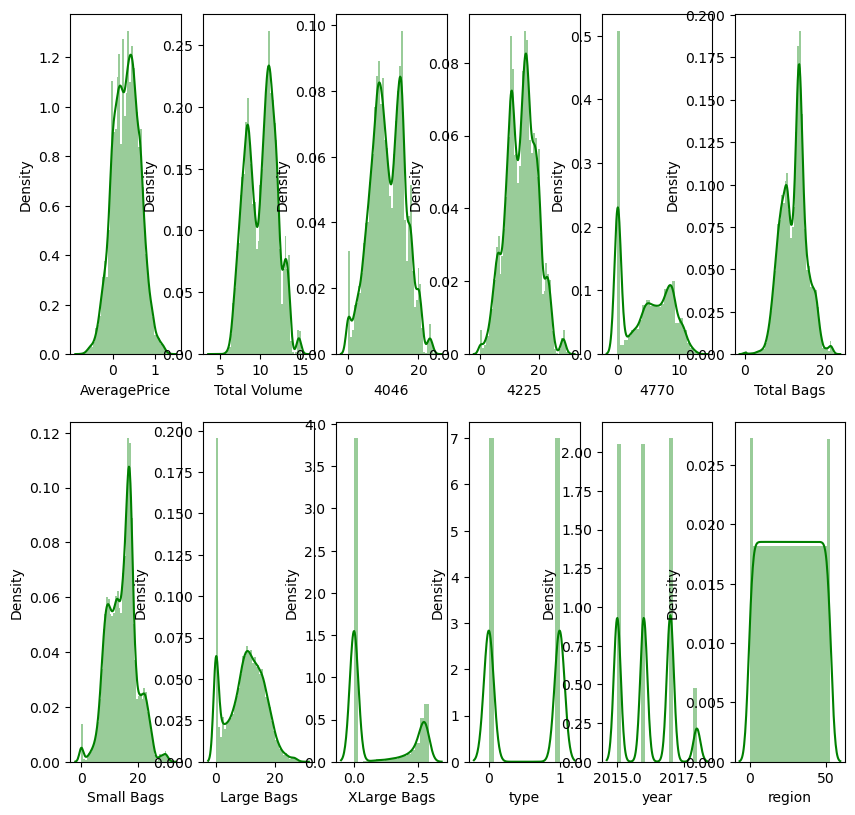

In [22]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df1.columns:
    if pltnum<18:
        plt.subplot(3,6, pltnum)
        sns.distplot(df1[i], color='g')
        plt.xlabel(i)
    pltnum+=1
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: Outiers Interpretation</span>

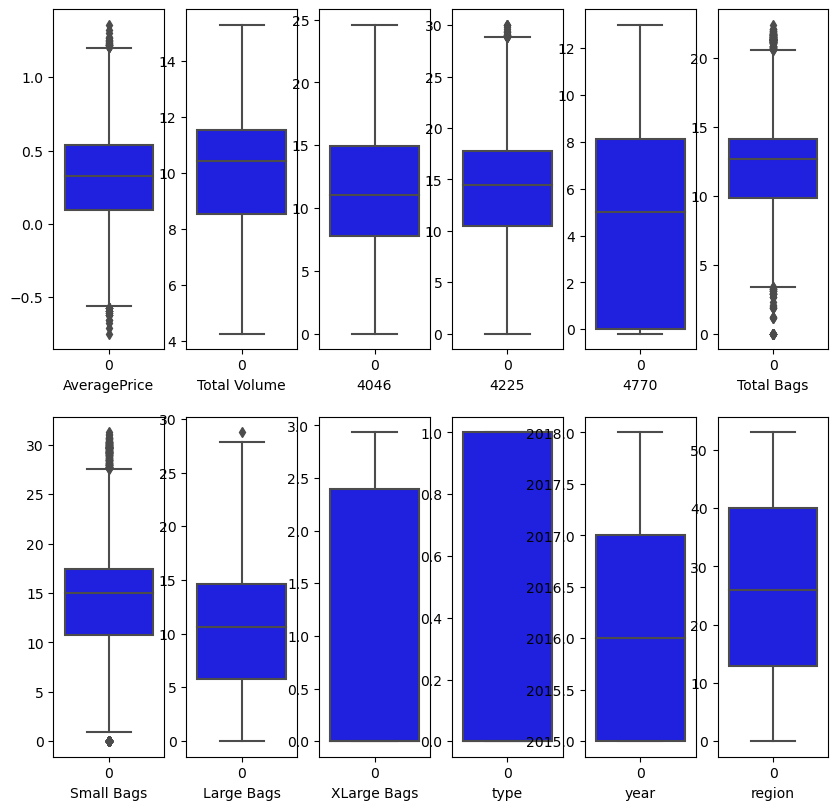

In [23]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df1.columns:
    if pltnum<18:
        plt.subplot(3,6, pltnum)
        sns.boxplot(df1[i], color='b')
        plt.xlabel(i)
    pltnum+=1
plt.show()

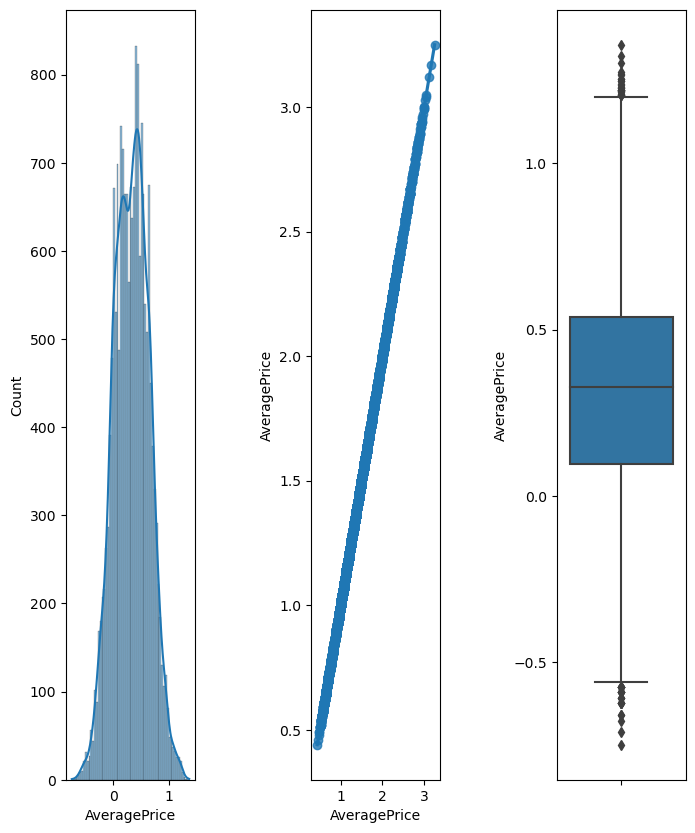

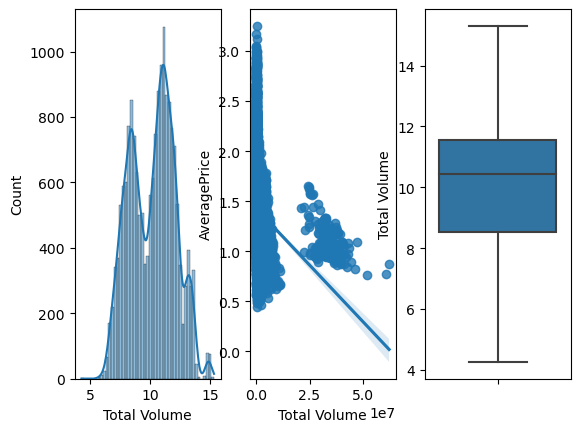

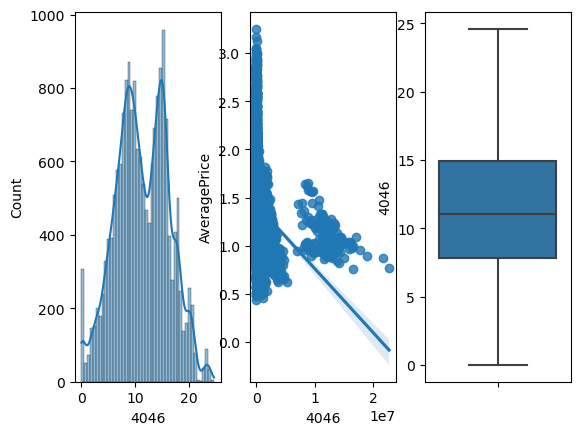

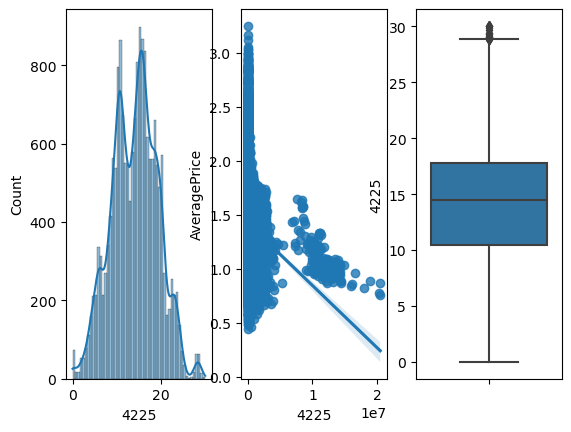

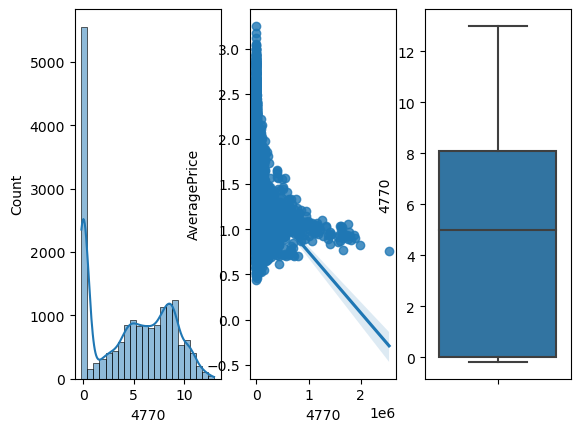

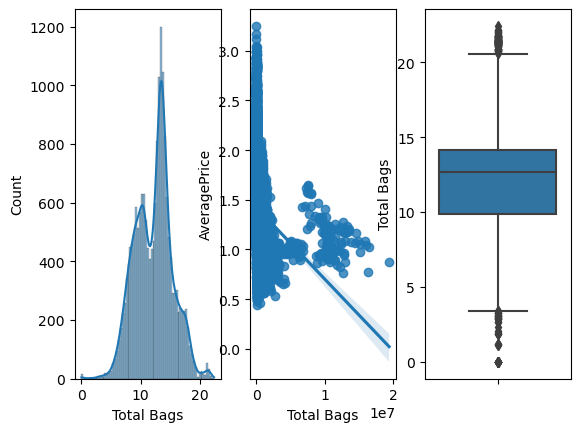

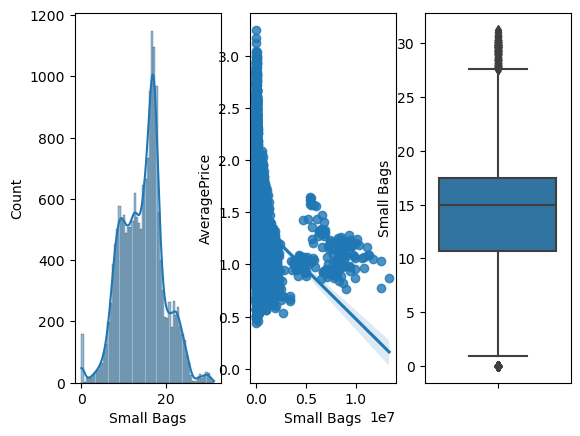

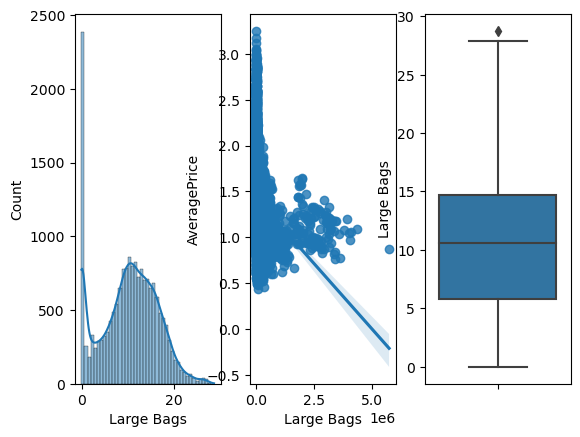

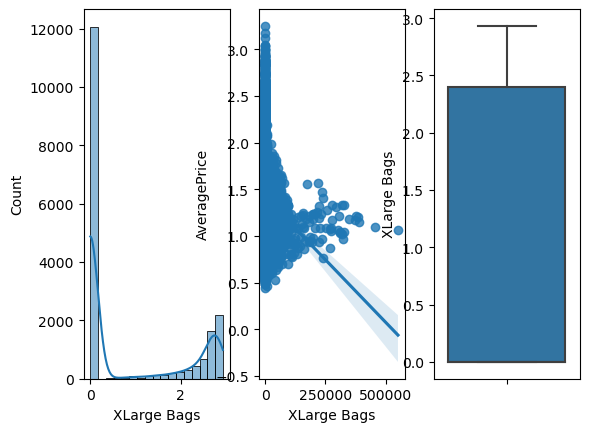

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U12'), dtype('float64')) -> None

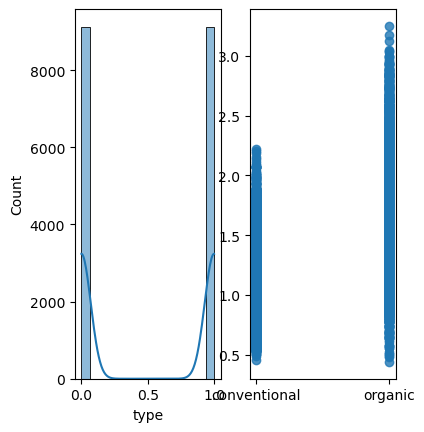

In [24]:
plt.figure(figsize=(8,10), facecolor='white')
pltnum=1
plt.subplots_adjust(wspace=0.9)
for i in df1.columns:
    if pltnum<18:
        # First subplot: Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(x=i, data=df1, kde=True)
    
    # Second subplot: Regression plot
        plt.subplot(1, 3, 2)
        sns.regplot(x=i, y='AveragePrice', data=df)
    
    # Third subplot: Box plot
        plt.subplot(1, 3, 3)
        sns.boxplot(y=i, data=df1)
    
    # Display the plots
        plt.show()

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING AND CORRECTION OF OUTLIERS USING Z-SCORE</span>

In [25]:
from scipy.stats import zscore

z_score=zscore(df1)
z_score

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.083517,-0.086604,-0.656631,0.306351,-0.246693,-0.523993,-0.340604,-0.771927,-0.696744,-0.999836,-1.221282,-1.700252
1,-0.031915,-0.155741,-0.774095,0.230717,-0.199704,-0.485908,-0.306431,-0.761948,-0.696744,-0.999836,-1.221282,-1.700252
2,-1.268123,0.179316,-0.729475,0.578551,-0.003918,-0.551984,-0.366257,-0.749258,-0.696744,-0.999836,-1.221282,-1.700252
3,-0.784968,0.003873,-0.632369,0.414119,-0.146288,-0.695293,-0.496684,-0.690030,-0.696744,-0.999836,-1.221282,-1.700252
4,-0.215175,-0.187634,-0.683131,0.223879,-0.135769,-0.669024,-0.477051,-0.598908,-0.696744,-0.999836,-1.221282,-1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.635374,-0.674555,-0.466543,-0.918074,-1.231530,-0.334590,-0.178943,-0.408747,-0.696744,1.000164,1.970504,1.700811
18245,0.809734,-0.767514,-0.618143,-0.664771,-1.231530,-0.496906,-0.325966,-0.479321,-0.696744,1.000164,1.970504,1.700811
18246,1.140487,-0.771469,-0.618092,-0.771575,0.404887,-0.490966,-0.308731,-0.944037,-0.696744,1.000164,1.970504,1.700811
18247,1.258927,-0.698044,-0.548973,-0.709810,0.404587,-0.424315,-0.248984,-0.908480,-0.696744,1.000164,1.970504,1.700811


In [26]:
outliers=(np.abs(z_score)>3).all(axis=1)
df1=df1[~outliers]
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.294870,10.021172,8.048942,15.704275,3.746230,10.576131,12.751261,5.366426,0.0,0,2015,0
1,0.310849,9.892382,7.480016,15.310511,3.924971,10.696283,12.922790,5.428228,0.0,0,2015,0
2,-0.071960,10.516534,7.696128,17.121395,4.669723,10.487823,12.622494,5.506816,0.0,0,2015,0
3,0.077655,10.189714,8.166453,16.265332,4.128159,10.035704,11.967819,5.873619,0.0,0,2015,0
4,0.254100,9.832972,7.920590,15.274912,4.168175,10.118578,12.066365,6.437947,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.517484,8.925925,8.969614,9.329721,0.000000,11.173670,13.562711,7.615633,0.0,1,2018,53
18245,0.571478,8.752758,8.235356,10.648455,0.000000,10.661585,12.824733,7.178563,0.0,1,2018,53
18246,0.673900,8.745391,8.235603,10.092416,6.224778,10.680325,12.911243,4.300533,0.0,1,2018,53
18247,0.710577,8.882169,8.570372,10.413975,6.223638,10.890599,13.211144,4.520737,0.0,1,2018,53


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Now, Firstly we will take AveragePrice as a TARGET VARIABLE and stored in seperate DataFrame</span>

In [27]:
df2=df1.copy()

In [28]:
X=df1.drop('AveragePrice', axis=1)
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,10.021172,8.048942,15.704275,3.746230,10.576131,12.751261,5.366426,0.0,0,2015,0
1,9.892382,7.480016,15.310511,3.924971,10.696283,12.922790,5.428228,0.0,0,2015,0
2,10.516534,7.696128,17.121395,4.669723,10.487823,12.622494,5.506816,0.0,0,2015,0
3,10.189714,8.166453,16.265332,4.128159,10.035704,11.967819,5.873619,0.0,0,2015,0
4,9.832972,7.920590,15.274912,4.168175,10.118578,12.066365,6.437947,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,8.925925,8.969614,9.329721,0.000000,11.173670,13.562711,7.615633,0.0,1,2018,53
18245,8.752758,8.235356,10.648455,0.000000,10.661585,12.824733,7.178563,0.0,1,2018,53
18246,8.745391,8.235603,10.092416,6.224778,10.680325,12.911243,4.300533,0.0,1,2018,53
18247,8.882169,8.570372,10.413975,6.223638,10.890599,13.211144,4.520737,0.0,1,2018,53


In [29]:
Y=df1['AveragePrice']
Y

0        0.294870
1        0.310849
2       -0.071960
3        0.077655
4        0.254100
           ...   
18244    0.517484
18245    0.571478
18246    0.673900
18247    0.710577
18248    0.510593
Name: AveragePrice, Length: 18249, dtype: float64

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Variance Inflation Factor: Normal Measured Between Predictors or Input Variables</span>

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [31]:
vif=pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range (len(X.columns))]
vif['Feattures']=X.columns
vif

,VIF values,Feattures
0,1493.746486,Total Volume
1,45.419563,4046
2,89.827320,4225
3,10.272682,4770
4,504.228594,Total Bags
5,143.656146,Small Bags
6,12.672666,Large Bags
7,3.069170,XLarge Bags
8,7.315442,type
9,347.761189,year


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">Scaling of Data: MINMAX SCALER</span>


In [32]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,10.021172,8.048942,15.704275,3.746230,10.576131,12.751261,5.366426,0.0,0,2015,0
1,9.892382,7.480016,15.310511,3.924971,10.696283,12.922790,5.428228,0.0,0,2015,0
2,10.516534,7.696128,17.121395,4.669723,10.487823,12.622494,5.506816,0.0,0,2015,0
3,10.189714,8.166453,16.265332,4.128159,10.035704,11.967819,5.873619,0.0,0,2015,0
4,9.832972,7.920590,15.274912,4.168175,10.118578,12.066365,6.437947,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,8.925925,8.969614,9.329721,0.000000,11.173670,13.562711,7.615633,0.0,1,2018,53
18245,8.752758,8.235356,10.648455,0.000000,10.661585,12.824733,7.178563,0.0,1,2018,53
18246,8.745391,8.235603,10.092416,6.224778,10.680325,12.911243,4.300533,0.0,1,2018,53
18247,8.882169,8.570372,10.413975,6.223638,10.890599,13.211144,4.520737,0.0,1,2018,53


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[-0.08660423, -0.65663105,  0.30635072, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.15574123, -0.77409523,  0.23071651, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [ 0.17931634, -0.72947525,  0.578551  , ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [-0.77146917, -0.61809184, -0.77157505, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.69804418, -0.5489735 , -0.70981007, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.66377797, -0.36762291, -0.78421247, ...,  1.00016441,
         1.97050371,  1.70081131]])

<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTING TRAINING AND TESTING DATA INTO 70:30 RATIO</span>

In [34]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.30)

<span style="color:blue;font-size: 15px;font-family: verdana;font-weight: bold ">CHECKING SHAPES OF SPLIT DATA INTO 70:30 RATIO</span>

In [35]:
X_train.shape


(12774, 11)

In [36]:
X_test.shape


(5475, 11)

In [37]:
Y_train.shape


(12774,)

In [38]:
Y_test.shape

(5475,)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Importing Machine learning Model library</span>

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Finding Best Random Size. </span>

In [40]:
minMSE = float('inf')
#Note: This line initializes a variable named minMSE and sets its value to positive infinity (float('inf')). 
#In Python, float('inf') represents positive infinity, which is a special floating-point value representing an unbounded positive quantity.
bestRandomState = 0

for i in range(1, 75):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    current_mse = mean_squared_error(Y_test, pred)
    
    if current_mse < minMSE:
        minMSE = current_mse
        bestRandomState = i

    print("VAlue of MSE is ", minMSE, " at Random State ", bestRandomState)

print("Minimum MSE is ", minMSE, " at Random State ", bestRandomState)

VAlue of MSE is  0.04460103725633269  at Random State  1
VAlue of MSE is  0.04460103725633269  at Random State  1
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is 

<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">Minimum MSE is  0.09177112686141767   at Random State  32 </span>

<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">LINEAR REGRESSION MODEL </span>

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=32)
Lr=LinearRegression()
Lr.fit(X_train,Y_train)
pred_Lr=Lr.predict(X_test)
pred_train=Lr.predict(X_train)
#mean_sq_err=mean_squared_error(pred,Y_test)
#print(mean_sq_err)

print("r_2 score", r2_score(Y_test,pred_Lr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_Lr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_Lr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_Lr)))

r_2 score 0.5105919841336902
r_2 score on Training Data 0.5414917477718353
Mean Absolute Error: 0.165578306699101
Mean Square Error: 0.044311308901835864
Root Square Error: 0.2105025151912344


<span style="color:Blue;font-size: 20px;font-family: verdana;font-weight: bold ">RANDOM FOREST REGRESSOR </span>


In [42]:
RFR=RandomForestRegressor()
RFR.fit(X_train, Y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_RFR ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_RFR ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_RFR))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_RFR)))

r_2 score 0.8445067829480595
r_2 score on Training Data 0.9801233415577614
Mean Absolute Error: 0.08516973869559673
Mean Square Error: 0.014078453457147507
Root Square Error: 0.11865265887095622


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">K NEAREST NEIGHBOR </span>

In [43]:
knn=KNN()
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_knn ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_knn ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_knn))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_knn)))

r_2 score 0.8277786627141503
r_2 score on Training Data 0.9031034086208563
Mean Absolute Error: 0.0892285749043556
Mean Square Error: 0.015593027961448801
Root Square Error: 0.12487204635725645


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">GRADIENT BOOSTING REGRESSOR </span>


In [44]:
gbb=GradientBoostingRegressor()
gbb.fit(X_train, Y_train)
pred_gbb=gbb.predict(X_test)
pred_train=gbb.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_gbb ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_gbb)))

r_2 score 0.687638210316565
r_2 score on Training Data 0.7233315184640001
Mean Absolute Error: 0.1285859170403365
Mean Square Error: 0.028281432471620835
Root Square Error: 0.1681708431078968


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">LASSO MODEL </span>

In [45]:
lasso=Lasso()
lasso.fit(X_train, Y_train)
lasso.fit(X_train,Y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_lasso ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_lasso ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_lasso))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_lasso)))

r_2 score -0.00037476147133674864
r_2 score on Training Data 0.0
Mean Absolute Error: 0.24524340398792144
Mean Square Error: 0.0905745587241581
Root Square Error: 0.3009560744098017


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">RIDGE MODEL </span>

In [46]:
rd=Ridge()
rd.fit(X_train, Y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_rd ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_rd ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_rd))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_rd)))

r_2 score 0.5105914017750708
r_2 score on Training Data 0.5414914873362178
Mean Absolute Error: 0.165574656394901
Mean Square Error: 0.044311361628950746
Root Square Error: 0.21050264043225383


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Decision Tree Regressor </span>

In [47]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
dtr.fit(X_train,Y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_dtr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_dtr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_dtr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_dtr)))

r_2 score 0.6582106574140923
r_2 score on Training Data 1.0
Mean Absolute Error: 0.11752752395350885
Mean Square Error: 0.03094582157971175
Root Square Error: 0.1759142449596159


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">SVR MODEL </span>

In [48]:
svr=SVR()
svr.fit(X_train,Y_train)
pred_svr=svr.predict(X_test)
pred_train=svr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_svr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_svr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_svr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_svr)))

r_2 score 0.7186018863395687
r_2 score on Training Data 0.7463129796748583
Mean Absolute Error: 0.12063452265168464
Mean Square Error: 0.02547796181214868
Root Square Error: 0.15961817506834453


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Extra Trees Regressor </span>

In [49]:
etr=ExtraTreesRegressor()
etr.fit(X_train,Y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_etr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_etr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_etr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_etr)))

r_2 score 0.8728514642879944
r_2 score on Training Data 1.0
Mean Absolute Error: 0.07638548696515056
Mean Square Error: 0.011512108219923078
Root Square Error: 0.1072944929617689


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score of Linear Regression and CVS </span>

In [50]:
score=cross_val_score(Lr, X, Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_Lr )- score.mean())

[0.0859574  0.1186606  0.47925679 0.15729295 0.22131377]
0.21249630193059543
Difference between r_2 score and Cross Validation score is 0.2980956822030948


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Random Forest Regression and Cross Validation Score</span>

In [51]:
score1=cross_val_score(RFR, X, Y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_RFR )- score1.mean())

[0.28094998 0.32170556 0.62709574 0.25273526 0.06154586]
0.30880648055057136
Difference between r_2 score and Cross Validation score is 0.5357003023974881


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of K Nearest Neighbor and Cross Validation Score</span>

In [52]:
score2=cross_val_score(knn, X, Y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_knn )- score2.mean())

[-0.04848494  0.28998552  0.45424054  0.26932659 -0.12846238]
0.16732106390835286
Difference between r_2 score and Cross Validation score is 0.6604575988057975


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Gradient Boost and Cross Validation Score</span>

In [53]:
score3=cross_val_score(gbb, X, Y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_gbb )- score3.mean())

[0.35211797 0.41110038 0.5941992  0.33166752 0.19728896]
0.37727480513363115
Difference between r_2 score and Cross Validation score is 0.31036340518293387


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Lasso and Cross Validation Score</span>

In [54]:
score4=cross_val_score(lasso, X, Y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso )- score4.mean())

[-2.71832167 -0.58201359 -0.0242671  -0.60965076 -0.96126606]
-0.9791038362087374
Difference between r_2 score and Cross Validation score is 0.9787290747374007


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Ridge and Cross Validation Score</span>

In [55]:
score5=cross_val_score(rd, X, Y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso )- score5.mean())

[0.08565236 0.11867025 0.47925439 0.15785447 0.22122464]
0.21253122096588656
Difference between r_2 score and Cross Validation score is -0.2129059824372233


<span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Decession Tree Regressor and Cross Validation Score</span>

In [56]:
score6=cross_val_score(dtr, X, Y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_dtr )- score6.mean())

[-0.57580617 -0.20692122  0.27334201 -0.43979151 -0.36917544]
-0.26367046839839514
Difference between r_2 score and Cross Validation score is 0.9218811258124875


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of SVR and Cross Validation Score</span>

In [57]:
score7=cross_val_score(svr, X, Y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_svr )- score7.mean())

[-0.69327632  0.3085484   0.1600527   0.33986448 -0.00366801]
0.022304248898264545
Difference between r_2 score and Cross Validation score is 0.6962976374413041


<span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Extra Tree Regressor and Cross Validation Score</span>

In [58]:
score8=cross_val_score(etr, X, Y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_etr )- score8.mean())

[0.32521421 0.37644823 0.61483501 0.40024728 0.10201315]
0.3637515756541462
Difference between r_2 score and Cross Validation score is 0.5090998886338483


<span style="color:Blue;font-size: 30px;font-family: verdana;font-weight: bold ">DECSESSION MAKING POINT</SPAN>

<span style="color:magenta;font-size: 20px;font-family: verdana;font-weight: bold ">Ridge:A small negative difference of -0.212 suggests a consistent performance as well. Ridge regression is useful for handling multicollinearity and can be a good choice when there are correlated features</span>

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">GRID SEARCH CV : RIDGE MODEl</SPAN>

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, r2_score

# Assuming X and Y are your feature matrix and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

# Initialize Ridge regression model
rd = Ridge()

# Define the hyperparameter grid to search
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rd, param_grid, scoring=make_scorer(r2_score), cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the Ridge model with the best hyperparameters on the entire training set
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, Y_train)

# Predict on the test set using the best model
pred_ridge = best_ridge_model.predict(X_test)

# Evaluate the model
print("Best alpha:", best_alpha)
print("R-squared score on test set:", r2_score(Y_test, pred_ridge))


Best alpha: 1.0
R-squared score on test set: 0.5105914017750708


In [62]:
rd=Ridge(alpha=best_alpha)
final_model=rd.fit(X_train,Y_train)
pred_finally=final_model.predict(X_test)

print("r_2 score", r2_score(Y_test,pred_finally ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_finally ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_finally))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_finally)))

r_2 score 0.5105914017750708
Mean Absolute Error: 0.165574656394901
Mean Square Error: 0.044311361628950746
Root Square Error: 0.21050264043225383


<span style="color:blue;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>


In [63]:
import joblib
joblib.dump(final_model,'AvocadoPrice.pkl')

['AvocadoPrice.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [64]:
prediction = final_model.predict(X_test)
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0.252805,0.334481
1,0.041376,0.564836
2,0.488938,0.425242
3,-0.015249,0.039401
4,0.628692,0.667700
